In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# 📂 Load dataset
df = pd.read_csv(r"C:\Users\user\Documents\Emp_Sal_Pred\adult 3.csv")  # Replace with your dataset path
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
# Drop rows with missing or unknown values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Show cleaned dataset shape and columns
print("Shape:", df.shape)
df.columns


Shape: (45222, 15)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

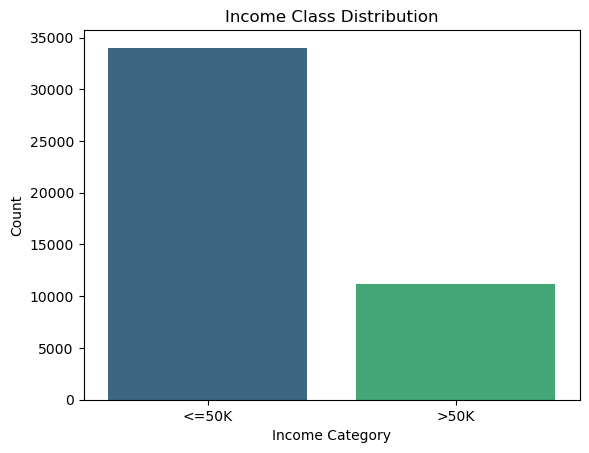

In [19]:
# 📊 Visualize Income Distribution (Future-proof)
sns.countplot(data=df, x='income', hue='income', palette='viridis', legend=False)
plt.title("Income Class Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()


In [21]:
features = ['age', 'education', 'gender', 'occupation', 'hours-per-week']
X = pd.get_dummies(df[features], drop_first=True)
y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)  # Binary encoding


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8044223327805418

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      6842
           1       0.66      0.42      0.51      2203

    accuracy                           0.80      9045
   macro avg       0.74      0.67      0.69      9045
weighted avg       0.79      0.80      0.79      9045



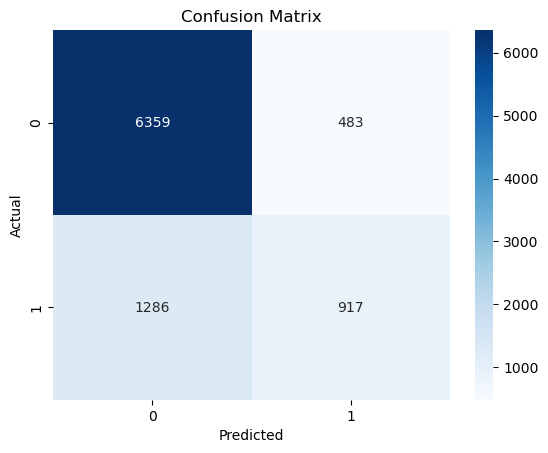

In [27]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
# Example input: [age, education, gender, occupation, hours-per-week]
input_data = pd.DataFrame([[29, 'Bachelors', 'Female', 'Tech-support', 40]],
                          columns=['age', 'education', 'gender', 'occupation', 'hours-per-week'])

input_encoded = pd.get_dummies(input_data)
input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)

pred = model.predict(input_encoded)[0]
print("Predicted Income Category: >50K" if pred == 1 else "Predicted Income Category: <=50K")


Predicted Income Category: <=50K
